In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

from matplotlib import rc
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from statsmodels.stats.multicomp import MultiComparison
from tools import *

%matplotlib inline
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
sns.set_style('ticks')
sns.set_context('poster')
sns.set_style('ticks')
sns.set_context('poster')

In [2]:
def load_data(files):
    raw_results = list()
    for filename in files:
        with open(filename, 'r') as infile:
            raw_results += json.load(infile)
    results = list_of_dicts_to_dict_of_lists(raw_results)
    del raw_results
    for key, value in results.items():
        results[key] = to_nested_tuples(value)
    rdf = pd.DataFrame(data=results)
    del results
    return rdf

masks = pd.read_csv('mnist_masks.csv')
optimizer_nice_names = {'adam': 'Adam', 'momentum': 'Momentum', 'rms': 'RMSProp', 'sgd': 'SGD'}

# Experiment 1 Train

In [3]:
rdf = load_data(['2020-05-27T12:00:38.066031-04:00.json'])
rdf = rdf[rdf['success']]
E12 = ((1, 2), (3, 4))
E34 = ((3, 4), (1, 2))
E1234 = ((1, 2, 3, 4), (1, 2), (3, 4))

E12_best = get_best(get_summary(rdf[rdf['phases'] == E12]), phase_time_metric(2, 50, 2500))['sgd']
E34_best = get_best(get_summary(rdf[rdf['phases'] == E34]), phase_time_metric(2, 50, 2500))['sgd']
E1234_best = get_best(get_summary(rdf[rdf['phases'] == E1234]), phase_time_metric(1, 50, 2500))['sgd']
print('{}: lr={}, count={}'.format(
    'E12',
    E12_best['lr'],
    E12_best['count'][0]))
print('{}: lr={}, count={}'.format(
    'E34',
    E34_best['lr'],
    E34_best['count'][0]))
print('{}: lr={}, count={}'.format(
    'E1234',
    E1234_best['lr'],
    E1234_best['count'][0]))

E12: lr=0.0625, count=50.0
E34: lr=0.0625, count=50.0
E1234: lr=0.03125, count=50.0


# Experiment 1 Test

In [4]:
rdf = load_data(['2020-05-28T13:46:08.169400-04:00.json'])
rdf = rdf[rdf['success']]
E12 = ((1, 2), (3, 4), (1, 2), (3, 4))
E34 = ((3, 4), (1, 2), (3, 4), (1, 2))
E1234 = ((1, 2, 3, 4), (1, 2), (3, 4))
ER = ((1, 2), (3, 4), (1, 2), (3, 4), (1, 2), (3, 4), (1, 2), (3, 4))

## H1

In [5]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E1234].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0] - 1][1])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h1_t, h1_p = st.ttest_1samp(accuracies, 0.9)
h1_p = h1_p / 2
print('H1: {} with p = {}'.format(
    'Reject' if (h1_p < 0.05 / 18) and (h1_t > 0) else 'Fail to Reject', h1_p))

Accuracy: 0.9477+-0.0010
H1: Reject with p = 1.1834132728736307e-184


## H2

In [6]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E1234].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0] - 1][2])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h2_t, h2_p = st.ttest_1samp(accuracies, 0.9)
h2_p = h2_p / 2
print('H2: {} with p = {}'.format(
    'Reject' if (h2_p < 0.05 / 18) and (h2_t > 0) else 'Fail to Reject', h2_p))

Accuracy: 0.9445+-0.0010
H2: Reject with p = 1.730548785309057e-184


## H3

In [7]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0] - 1][0])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h3_t, h3_p = st.ttest_1samp(accuracies, 0.9)
h3_p = h3_p / 2
print('H3: {} with p = {}'.format(
    'Reject' if (h3_p < 0.05 / 18) and (h3_t > 0) else 'Fail to Reject', h3_p))

Accuracy: 0.9548+-0.0036
H3: Reject with p = 4.1906441096514885e-43


## H4

In [8]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0] + v['phase_length'][1] - 1][1])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h4_t, h4_p = st.ttest_1samp(accuracies, 0.9)
h4_p = h4_p / 2
print('H4: {} with p = {}'.format(
    'Reject' if (h4_p < 0.05 / 18) and (h4_t > 0) else 'Fail to Reject', h4_p))

Accuracy: 0.9757+-0.0005
H4: Reject with p = 0.0


## H5

In [9]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0] + v['phase_length'][1] - 1][0])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h5_t, h5_p = st.ttest_1samp(accuracies, 0.9)
h5_p = h5_p / 2
print('H5: {} with p = {}'.format(
    'Reject' if (h5_p < 0.05 / 18) and (h5_t < 0) else 'Fail to Reject', h5_p))

Accuracy: 0.0359+-0.0033
H5: Reject with p = 0.0


## H6

In [10]:
P1_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    P1_time.append(v['phase_length'][0])
P3_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    P3_time.append(v['phase_length'][2])
print('P1: {0:.4f}+-{1:.4f}\nP3: {2:8.4f}+-{3:.4f}'.format(
    np.mean(P1_time),
    np.std(P1_time) / np.sqrt(len(P1_time)),
    np.mean(P3_time),
    np.std(P3_time) / np.sqrt(len(P3_time))))
h6_t, h6_p = st.ttest_ind(P1_time, P3_time)
h6_p = h6_p / 2
print('H6: {} with p = {}'.format(
    'Reject' if (h6_p < 0.05 / 18) and (h6_t > 0) else 'Fail to Reject', h6_p))

P1: 139.8400+-2.7381
P3:  51.3300+-1.4999
H6: Reject with p = 2.7858971787065335e-130


## H7

In [11]:
P2_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    P2_time.append(v['phase_length'][1])
P4_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    P4_time.append(v['phase_length'][3])
print('P2: {0:.4f}+-{1:.4f}\nP4: {2:8.4f}+-{3:.4f}'.format(
    np.mean(P2_time),
    np.std(P2_time) / np.sqrt(len(P2_time)),
    np.mean(P4_time),
    np.std(P4_time) / np.sqrt(len(P4_time))))
h7_t, h7_p = st.ttest_ind(P2_time, P4_time)
h7_p = h7_p / 2
print('H8: {} with p = {}'.format(
    'Reject' if (h7_p < 0.05 / 18) and (h7_t > 0) else 'Fail to Reject', h7_p))

P2: 160.2000+-2.0256
P4:  33.3200+-1.0458
H8: Reject with p = 3.1807853915774657e-308


## H8

In [12]:
E1234_time = list()
for k,v in rdf[rdf['phases'] == E1234].iterrows():
    E1234_time.append(v['phase_length'][0])
E12_time = list()
for k,v in rdf[rdf['phases'] == E12].iterrows():
    E12_time.append(v['phase_length'][0] + v['phase_length'][1])
print('E1234: {0:.4f}+-{1:.4f}\nE12: {2:11.4f}+-{3:.4f}'.format(
    np.mean(E1234_time),
    np.std(E1234_time) / np.sqrt(len(E1234_time)),
    np.mean(E12_time),
    np.std(E12_time) / np.sqrt(len(E12_time))))
h8_t, h8_p = st.ttest_ind(E1234_time, E12_time)
print('H8: {} with p = {}'.format(
    'Reject' if (h8_p < 0.05 / 18) else 'Fail to Reject', h8_p))

E1234: 1192.4800+-10.1288
E12:    300.0400+-3.7831
H8: Reject with p = 0.0


## H9

In [13]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E34].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0] - 1][0])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h9_t, h9_p = st.ttest_1samp(accuracies, 0.9)
h9_p = h9_p / 2
print('H9: {} with p = {}'.format(
    'Reject' if (h9_p < 0.05 / 18) and (h9_t > 0) else 'Fail to Reject', h9_p))

Accuracy: 0.9629+-0.0029
H9: Reject with p = 3.656971171976239e-74


## H10

In [14]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E34].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0] + v['phase_length'][1] - 1][1])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h10_t, h10_p = st.ttest_1samp(accuracies, 0.9)
h10_p = h10_p / 2
print('H4: {} with p = {}'.format(
    'Reject' if (h10_p < 0.05 / 18) and (h10_t > 0) else 'Fail to Reject', h10_p))

Accuracy: 0.9768+-0.0005
H4: Reject with p = 0.0


## H11

In [15]:
accuracies = list()
for k,v in rdf[rdf['phases'] == E34].iterrows():
    accuracies.append(v['accuracies'][v['phase_length'][0] + v['phase_length'][1] - 1][0])
print('Accuracy: {0:.4f}+-{1:.4f}'.format(
    np.mean(accuracies),
    np.std(accuracies) / np.sqrt(len(accuracies))))
h11_t, h11_p = st.ttest_1samp(accuracies, 0.9)
h11_p = h11_p / 2
print('H11: {} with p = {}'.format(
    'Reject' if (h11_p < 0.05 / 18) and (h11_t < 0) else 'Fail to Reject', h11_p))

Accuracy: 0.0107+-0.0012
H11: Reject with p = 0.0


## Plotting

In [16]:
max_phase_lengths = list()
for _, row in rdf.iterrows():
    for i, l in enumerate(row['phase_length']):
        if len(max_phase_lengths) == i:
            max_phase_lengths.append(0)
        max_phase_lengths[i] = max(max_phase_lengths[i], l)
data = dict()
for k in rdf['phases'].unique():
    data[k] = dict()
    for k2 in ['d1_count',
               'd2_count']:
        data[k][k2] = [np.zeros(i, dtype=int) for i in max_phase_lengths]
    for k2 in ['d1_avg',
               'd1_sec',
               'd1_min',
               'd1_max',
               'd2_avg',
               'd2_sec',
               'd2_min',
               'd2_max']:
        data[k][k2] = [np.zeros(i, dtype=float) for i in max_phase_lengths]
    data[k]['phase_lengths'] = [list() for i in max_phase_lengths]
    for i in range(len(max_phase_lengths)):
        data[k]['d1_min'][i] += 1
        data[k]['d2_min'][i] += 1

    kdf = rdf[rdf['phases'] == k]
    for _, row in kdf.iterrows():
        j = 0
        for i, l in enumerate(row['phase_length']):
            data[k]['phase_lengths'][i].append(l)

            if k == E1234:
                d1_index = 1
                d2_index = 2
            elif k == E12:
                d1_index = 0
                d2_index = 1
            elif k == E34:
                d1_index = 1
                d2_index = 0
            else:
                assert k == ER
                d1_index = 0
                d2_index = 1
            
            values = np.array(row['accuracies'])[j:j + l, d1_index]
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['d1_avg'][i][mask]
            data[k]['d1_count'][i][mask] += 1
            data[k]['d1_avg'][i][mask] += delta / data[k]['d1_count'][i][mask]
            data[k]['d1_sec'][i][mask] += delta * (values - data[k]['d1_avg'][i][mask])
            data[k]['d1_min'][i][mask] = np.minimum(data[k]['d1_min'][i][mask], values)
            data[k]['d1_max'][i][mask] = np.maximum(data[k]['d1_max'][i][mask], values)

            values = np.array(row['accuracies'])[j:j + l, d2_index]
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['d2_avg'][i][mask]
            data[k]['d2_count'][i][mask] += 1
            data[k]['d2_avg'][i][mask] += delta / data[k]['d2_count'][i][mask]
            data[k]['d2_sec'][i][mask] += delta * (values - data[k]['d2_avg'][i][mask])
            data[k]['d2_min'][i][mask] = np.minimum(data[k]['d2_min'][i][mask], values)
            data[k]['d2_max'][i][mask] = np.maximum(data[k]['d2_max'][i][mask], values)

            j += l
    data[k]['d1_sem'] = list()
    data[k]['d2_sem'] = list()
    for i in range(len(max_phase_lengths)):
        data[k]['d1_sem'].append(np.nan_to_num(np.sqrt(data[k]['d1_sec'][i]) / data[k]['d1_count'][i]))
        data[k]['d2_sem'].append(np.nan_to_num(np.sqrt(data[k]['d2_sec'][i]) / data[k]['d2_count'][i]))
    del data[k]['d1_sec']
    del data[k]['d2_sec']

/Users/dylanashley/.miniconda3/envs/tensorflow-1.13.1/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/dylanashley/.miniconda3/envs/tensorflow-1.13.1/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide


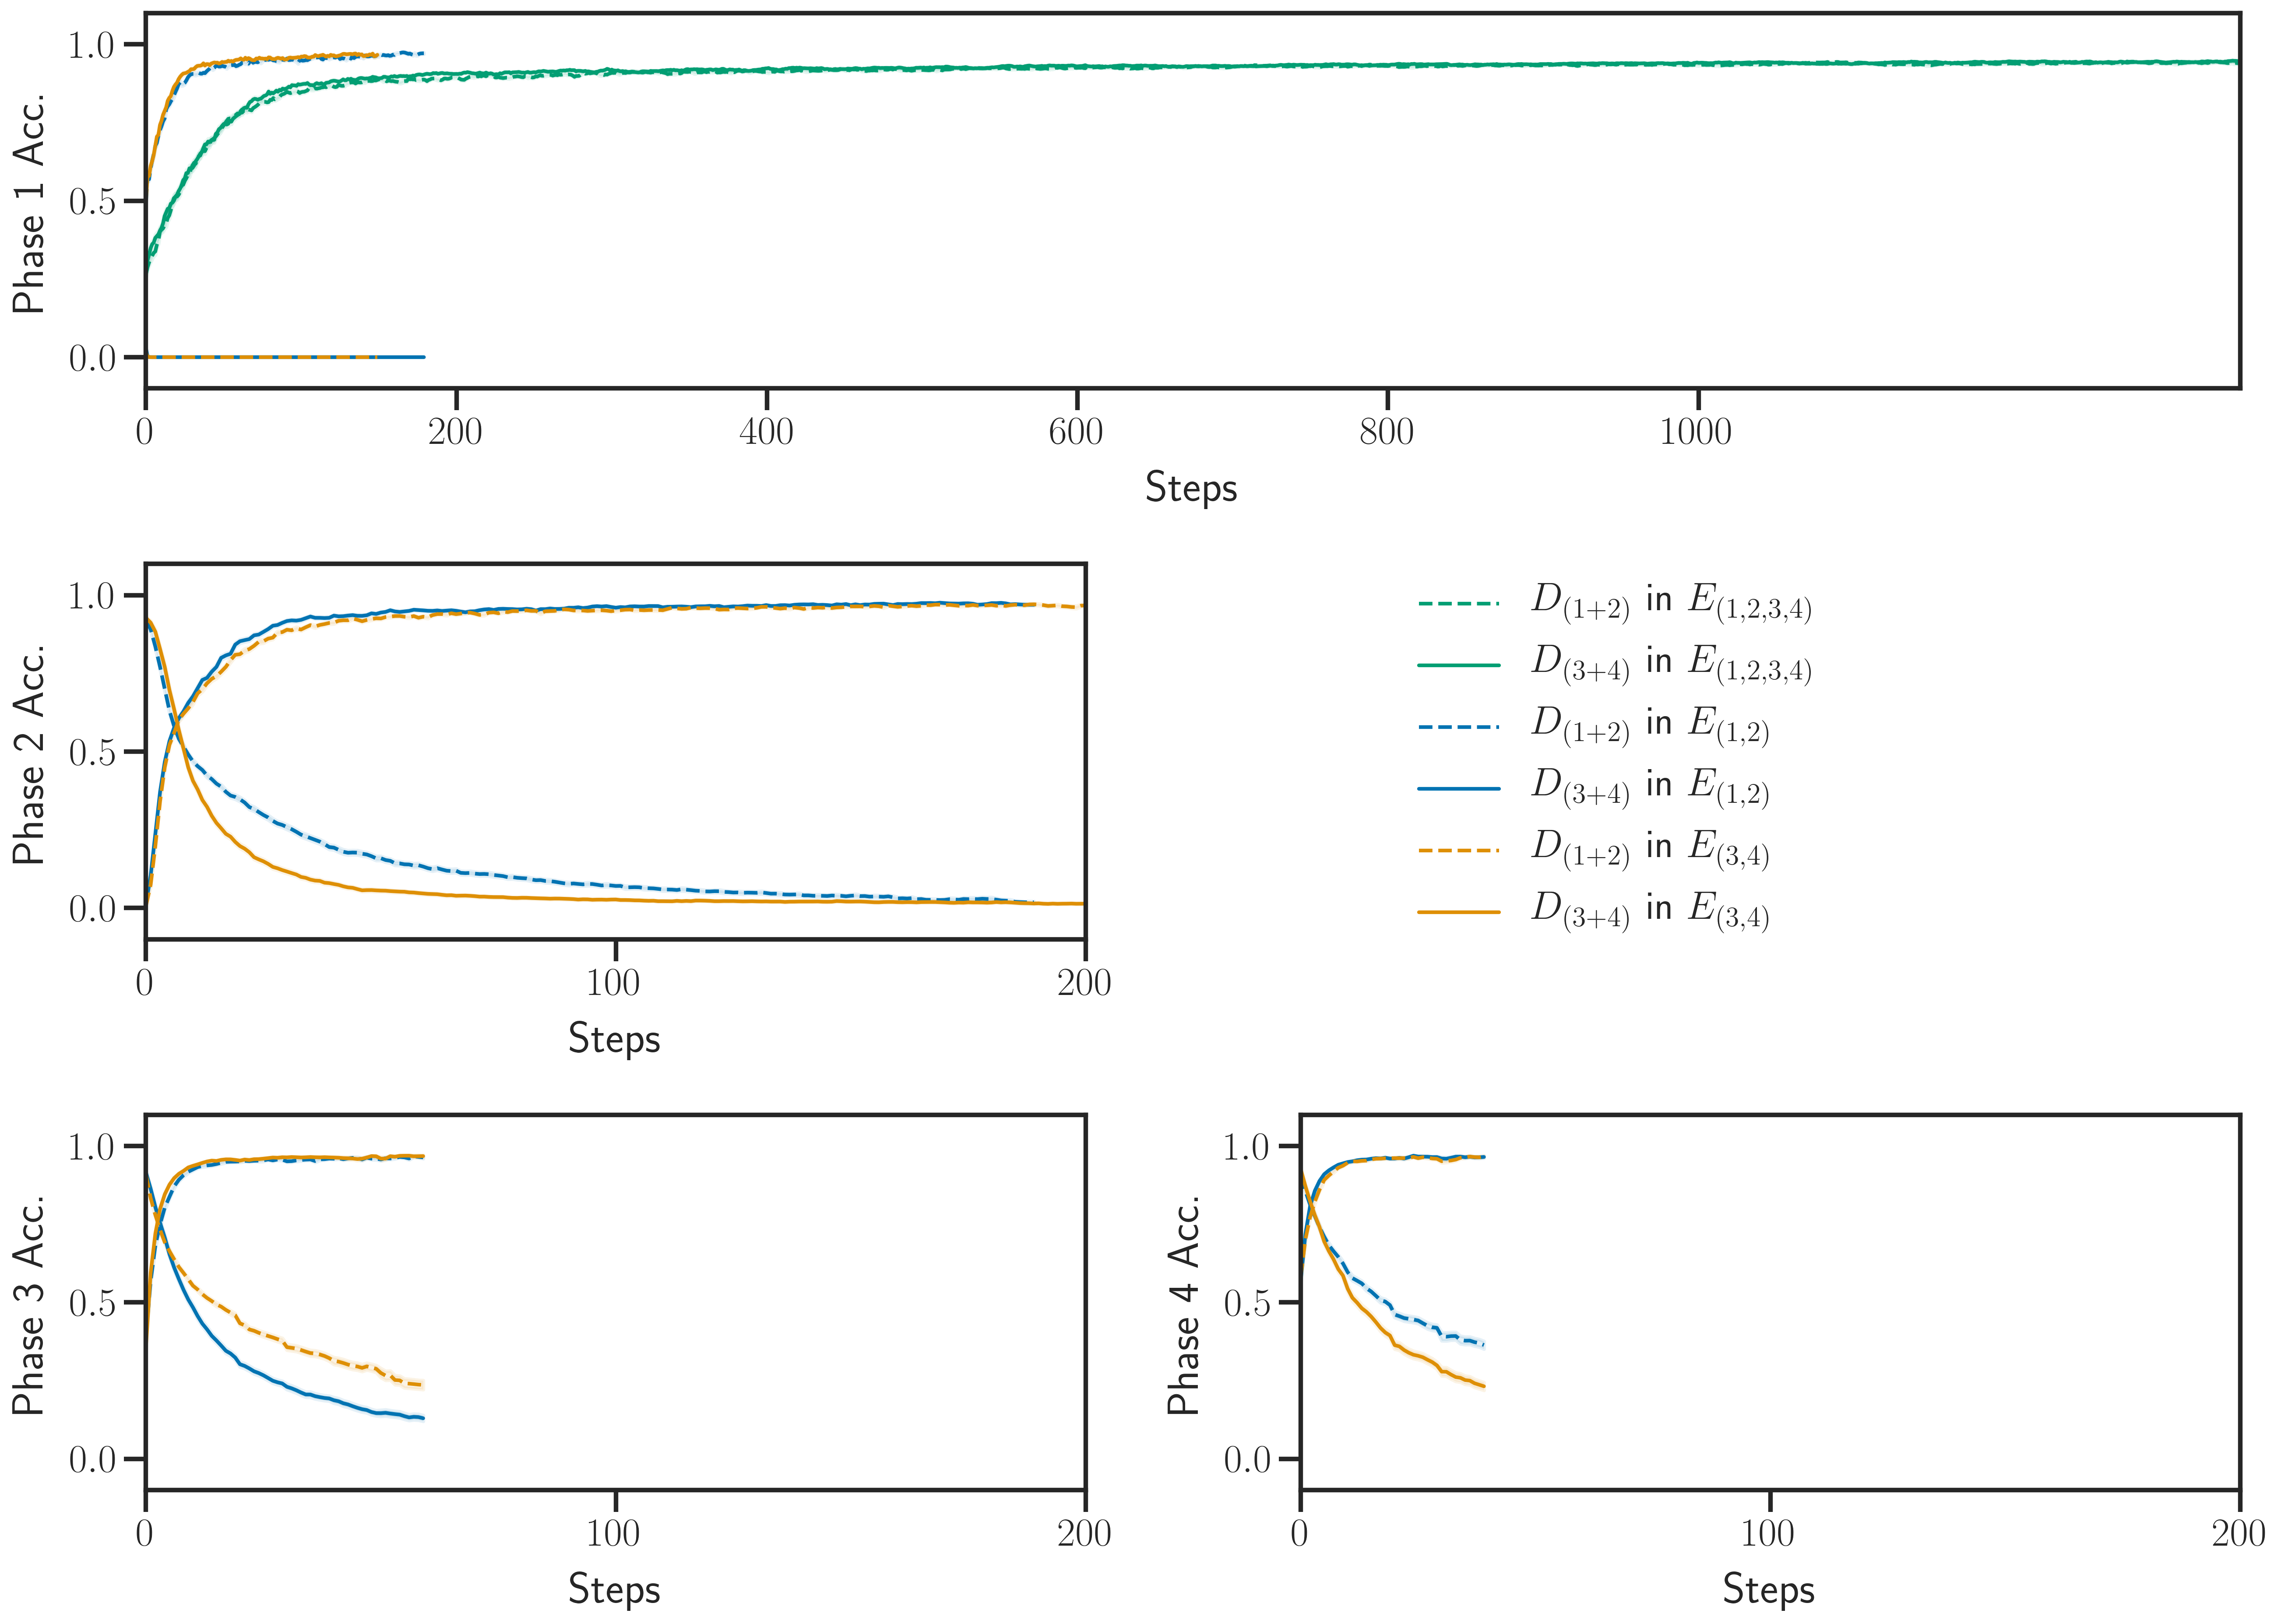

In [17]:
threshold = 125
fig = plt.figure(figsize=(18, 13), dpi=300)
gs = GridSpec(3, 2, figure=fig)
axarr = list()
axarr.append(fig.add_subplot(gs[0, :]))
axarr.append(fig.add_subplot(gs[1, 0]))
axarr.append(fig.add_subplot(gs[2, 0]))
axarr.append(fig.add_subplot(gs[2, 1]))
colors = sns.color_palette('colorblind', len(data.keys()))
xmax = 0

# phase 1 plot
ax = axarr[0]

x = np.where(data[E1234]['d1_count'][0] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E1234]['d1_avg'][0][x]
yerr = data[E1234]['d1_sem'][0][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[2], alpha=0.1)
ax.plot(x, y, color=colors[2], label=r'$D_{(1 + 2)}$ in $E_{(1, 2, 3, 4)}$', linestyle='--', linewidth=2)

x = np.where(data[E1234]['d2_count'][0] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E1234]['d2_avg'][0][x]
yerr = data[E1234]['d2_sem'][0][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[2], alpha=0.1)
ax.plot(x, y, color=colors[2], label=r'$D_{(3 + 4)}$ in $E_{(1, 2, 3, 4)}$', linestyle='-', linewidth=2)

x = np.where(data[E12]['d1_count'][0] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d1_avg'][0][x]
yerr = data[E12]['d1_sem'][0][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], label=r'$D_{(1 + 2)}$ in $E_{(1, 2)}$', linestyle='--', linewidth=2)

x = np.where(data[E12]['d2_count'][0] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d2_avg'][0][x]
yerr = data[E12]['d2_sem'][0][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], label=r'$D_{(3 + 4)}$ in $E_{(1, 2)}$', linestyle='-', linewidth=2)

x = np.where(data[E34]['d1_count'][0] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d1_avg'][0][x]
yerr = data[E34]['d1_sem'][0][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], label=r'$D_{(1 + 2)}$ in $E_{(3, 4)}$', linestyle='--', linewidth=2)

x = np.where(data[E34]['d2_count'][0] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d2_avg'][0][x]
yerr = data[E34]['d2_sem'][0][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], label=r'$D_{(3 + 4)}$ in $E_{(3, 4)}$', linestyle='-', linewidth=2)

# phase 2 plot
ax = axarr[1]

x = np.where(data[E12]['d1_count'][1] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d1_avg'][1][x]
yerr = data[E12]['d1_sem'][1][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], linestyle='--', linewidth=2)

x = np.where(data[E12]['d2_count'][1] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d2_avg'][1][x]
yerr = data[E12]['d2_sem'][1][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], linestyle='-', linewidth=2)

x = np.where(data[E34]['d1_count'][1] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d1_avg'][1][x]
yerr = data[E34]['d1_sem'][1][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], linestyle='--', linewidth=2)

x = np.where(data[E34]['d2_count'][1] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d2_avg'][1][x]
yerr = data[E34]['d2_sem'][1][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], linestyle='-', linewidth=2)

# phase 3 plot
ax = axarr[2]

x = np.where(data[E12]['d1_count'][2] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d1_avg'][2][x]
yerr = data[E12]['d1_sem'][2][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], linestyle='--', linewidth=2)

x = np.where(data[E12]['d2_count'][2] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d2_avg'][2][x]
yerr = data[E12]['d2_sem'][2][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], linestyle='-', linewidth=2)

x = np.where(data[E34]['d1_count'][2] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d1_avg'][2][x]
yerr = data[E34]['d1_sem'][2][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], linestyle='--', linewidth=2)

x = np.where(data[E34]['d2_count'][2] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d2_avg'][2][x]
yerr = data[E34]['d2_sem'][2][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], linestyle='-', linewidth=2)

# phase 4 plot
ax = axarr[3]

x = np.where(data[E12]['d1_count'][3] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d1_avg'][3][x]
yerr = data[E12]['d1_sem'][3][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], linestyle='--', linewidth=2)

x = np.where(data[E12]['d2_count'][3] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E12]['d2_avg'][3][x]
yerr = data[E12]['d2_sem'][3][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[0], alpha=0.1)
ax.plot(x, y, color=colors[0], linestyle='-', linewidth=2)

x = np.where(data[E34]['d1_count'][3] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d1_avg'][3][x]
yerr = data[E34]['d1_sem'][3][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], linestyle='--', linewidth=2)

x = np.where(data[E34]['d2_count'][3] >= threshold)[0]
xmax = max(xmax, max(x))
y = data[E34]['d2_avg'][3][x]
yerr = data[E34]['d2_sem'][3][x]
ax.fill_between(x, y - yerr, y + yerr, color=colors[1], alpha=0.1)
ax.plot(x, y, color=colors[1], linestyle='-', linewidth=2)

# clean up plot
for j in range(len(axarr)):
    ax = axarr[j]
    ax.set_ylim(-0.1, 1.1)
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_xlabel(r'Steps', labelpad=10)
axarr[0].set_ylabel(r'Phase 1 Acc.', labelpad=10)
axarr[0].set_xticks([0, 200, 400, 600, 800, 1000])
axarr[0].set_xlim(0, max(xmax, 1050))
axarr[1].set_ylabel(r'Phase 2 Acc.', labelpad=10)
axarr[1].set_xticks([0, 100, 200])
axarr[1].set_xlim(0, 200)
axarr[2].set_ylabel(r'Phase 3 Acc.', labelpad=10)
axarr[2].set_xticks([0, 100, 200])
axarr[2].set_xlim(0, 200)
axarr[3].set_ylabel(r'Phase 4 Acc.', labelpad=10)
axarr[3].set_xticks([0, 100, 200])
axarr[3].set_xlim(0, 200)
fig.legend(frameon=False, loc=(0.615, 0.415))
fig.tight_layout(pad=3)

# save plot
fig.savefig('experiment_1_accuracies.pdf', bbox_inches='tight')

In [18]:
text = ''
text += '|-------|---------------|\n'
text += '| Phase | Steps         |\n'
text += '|-------|---------------|\n'
for i, phase_lengths in enumerate(data[ER]['phase_lengths']):
    text += '| {0:>5} | {1:>7.2f}+-{2:4.2f} |\n'.format(
        i + 1,
        np.mean(phase_lengths),
        np.std(phase_lengths) / np.sqrt(len(phase_lengths)))
text += '|-------|---------------|\n'
with open('experiment_1_extended_phase_lengths.txt', 'w') as outfile:
    print(text, file=outfile)
print(text)

|-------|---------------|
| Phase | Steps         |
|-------|---------------|
|     1 |  139.84+-2.74 |
|     2 |  160.20+-2.03 |
|     3 |   51.33+-1.50 |
|     4 |   33.32+-1.05 |
|     5 |   25.41+-0.85 |
|     6 |   19.44+-0.66 |
|     7 |   21.81+-0.93 |
|     8 |   16.04+-0.62 |
|-------|---------------|



# Experiment 2 Train

In [19]:
rdf = load_data(['2020-05-27T12:12:12.795156-04:00.json'])
rdf = rdf[rdf['success']]
for i in rdf.index:
    if (rdf.at[i, 'optimizer'] == 'sgd') and (float(rdf.at[i, 'momentum']) > 0):
        rdf.at[i, 'optimizer'] = 'momentum'

best = get_best(get_summary(rdf[rdf['init_seed'] < 50]), total_time_metric(50, 2500))
print('{}: lr={}, count={}'.format(
    optimizer_nice_names['sgd'],
    best['sgd']['lr'],
    best['sgd']['count'][0]))
print('{}: lr={}, momentum={}, count={}'.format(
    optimizer_nice_names['momentum'],
    best['momentum']['lr'],
    best['momentum']['momentum'],
    best['momentum']['count'][0]))
print('{}: lr={}, rho={}, count={}'.format(
    optimizer_nice_names['rms'],
    best['rms']['lr'],
    best['rms']['rho'],
    best['rms']['count'][0]))
print('{}: lr={}, beta_1={}, beta_2={}, count={}'.format(
    optimizer_nice_names['adam'],
    best['adam']['lr'],
    best['adam']['beta_1'],
    best['adam']['beta_2'],
    best['adam']['count'][0]))

SGD: lr=0.0625, count=50.0
Momentum: lr=0.0078125, momentum=0.81, count=50.0
RMSProp: lr=0.001953125, rho=0.99, count=50.0
Adam: lr=0.001953125, beta_1=0.9, beta_2=0.999, count=50.0


# Experiment 2 Test

In [20]:
rdf = load_data(['2020-05-28T13:50:16.804153-04:00.json'])
rdf = rdf[rdf['success']]
for i in rdf.index:
    if (rdf.at[i, 'optimizer'] == 'sgd') and (float(rdf.at[i, 'momentum']) > 0):
        rdf.at[i, 'optimizer'] = 'momentum'

## H13

In [21]:
accuracies = {name: list() for name in list(set(rdf['optimizer'].unique()) - {'constant'})}
for k,v in rdf.iterrows():
    if v['optimizer'] != 'constant':
        accuracies[v['optimizer']].append(v['accuracies'][v['phase_length'][0] + v['phase_length'][1] - 1][0])
for k,v in accuracies.items():
    print('{0}: {1:.4f}+-{2:.4f}'.format(
        optimizer_nice_names[k],
        np.mean(v),
        np.std(v) / np.sqrt(len(v))))
print()
h13_t, h13_p = st.f_oneway(* accuracies.values())
print('H13: {} with p = {}'.format(
    'Reject' if (h13_p < 0.05 / 18) else 'Fail to Reject', h13_p))
print()
df = {'optimizer': list(), 'accuracy': list()}
for k, v in accuracies.items():
    df['accuracy'] += v
    df['optimizer'] += [k] * len(v)
df = pd.DataFrame(df)
h13_tukey = str(MultiComparison(df['accuracy'], df['optimizer']).tukeyhsd(0.05 / 18).summary())
print(h13_tukey)

SGD: 0.0477+-0.0036
Momentum: 0.0061+-0.0011
RMSProp: 0.1337+-0.0057
Adam: 0.0022+-0.0007

H13: Reject with p = 4.2884982996205116e-167

  Multiple Comparison of Means - Tukey HSD, FWER=0.00   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
    adam momentum    0.004 0.8295 -0.0131   0.021  False
    adam      rms   0.1315  0.001  0.1145  0.1485   True
    adam      sgd   0.0456  0.001  0.0286  0.0626   True
momentum      rms   0.1276  0.001  0.1105  0.1446   True
momentum      sgd   0.0416  0.001  0.0246  0.0586   True
     rms      sgd  -0.0859  0.001 -0.1029 -0.0689   True
--------------------------------------------------------


## H14

In [22]:
accuracies = {name: list() for name in list(set(rdf['optimizer'].unique()) - {'constant'})}
for k,v in rdf.iterrows():
    if v['optimizer'] != 'constant':
        accuracies[v['optimizer']].append(v['phase_length'][0] / v['phase_length'][2])
for k,v in accuracies.items():
    print('{0}: {1:.4f}+-{2:.4f}'.format(
        optimizer_nice_names[k],
        np.mean(v),
        np.std(v) / np.sqrt(len(v))))
print()
h14_t, h14_p = st.f_oneway(* accuracies.values())
print('H14: {} with p = {}'.format(
    'Reject' if (h14_p < 0.05 / 18) else 'Fail to Reject', h14_p))
print()
df = {'optimizer': list(), 'accuracy': list()}
for k, v in accuracies.items():
    df['accuracy'] += v
    df['optimizer'] += [k] * len(v)
df = pd.DataFrame(df)
h14_tukey = str(MultiComparison(df['accuracy'], df['optimizer']).tukeyhsd(0.05 / 18).summary())
print(h14_tukey)

SGD: 3.6160+-0.1845
Momentum: 1.5196+-0.0388
RMSProp: 1.9010+-0.0967
Adam: 0.6660+-0.0135

H14: Reject with p = 3.3327406886008133e-80

  Multiple Comparison of Means - Tukey HSD, FWER=0.00  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
    adam momentum   0.8536  0.001  0.3291 1.3781   True
    adam      rms    1.235  0.001  0.7105 1.7595   True
    adam      sgd     2.95  0.001  2.4255 3.4744   True
momentum      rms   0.3814 0.0546 -0.1431 0.9059  False
momentum      sgd   2.0964  0.001  1.5719 2.6208   True
     rms      sgd    1.715  0.001  1.1905 2.2395   True
-------------------------------------------------------


## H15

In [23]:
accuracies = {name: list() for name in list(set(rdf['optimizer'].unique()) - {'constant'})}
for k,v in rdf.iterrows():
    if v['optimizer'] != 'constant':
        accuracies[v['optimizer']].append(v['activation_overlap'][v['phase_length'][0] - 1])
for k,v in accuracies.items():
    print('{0}: {1:.4f}+-{2:.4f}'.format(
        optimizer_nice_names[k],
        np.mean(v),
        np.std(v) / np.sqrt(len(v))))
print()
h15_t, h15_p = st.f_oneway(* accuracies.values())
print('H15: {} with p = {}'.format(
    'Reject' if (h15_p < 0.05 / 18) else 'Fail to Reject', h15_p))
print()
df = {'optimizer': list(), 'accuracy': list()}
for k, v in accuracies.items():
    df['accuracy'] += v
    df['optimizer'] += [k] * len(v)
df = pd.DataFrame(df)
h15_tukey = str(MultiComparison(df['accuracy'], df['optimizer']).tukeyhsd(0.05 / 18).summary())
print(h15_tukey)

SGD: 0.8394+-0.0008
Momentum: 0.8518+-0.0008
RMSProp: 0.9066+-0.0013
Adam: 0.9141+-0.0008

H15: Reject with p = 0.0

  Multiple Comparison of Means - Tukey HSD, FWER=0.00  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
    adam momentum  -0.0624 0.001  -0.067 -0.0577   True
    adam      rms  -0.0075 0.001 -0.0122 -0.0029   True
    adam      sgd  -0.0747 0.001 -0.0794 -0.0701   True
momentum      rms   0.0548 0.001  0.0502  0.0595   True
momentum      sgd  -0.0124 0.001  -0.017 -0.0077   True
     rms      sgd  -0.0672 0.001 -0.0719 -0.0626   True
-------------------------------------------------------


## H16

In [24]:
accuracies = {name: list() for name in list(set(rdf['optimizer'].unique()) - {'constant'})}
for k,v in rdf.iterrows():
    if v['optimizer'] != 'constant':
        accuracies[v['optimizer']].append(v['activation_overlap'][v['phase_length'][0] + v['phase_length'][1] - 1])
for k,v in accuracies.items():
    print('{0}: {1:.4f}+-{2:.4f}'.format(
        optimizer_nice_names[k],
        np.mean(v),
        np.std(v) / np.sqrt(len(v))))
print()
h16_t, h16_p = st.f_oneway(* accuracies.values())
print('H16: {} with p = {}'.format(
    'Reject' if (h16_p < 0.05 / 18) else 'Fail to Reject', h16_p))
print()
df = {'optimizer': list(), 'accuracy': list()}
for k, v in accuracies.items():
    df['accuracy'] += v
    df['optimizer'] += [k] * len(v)
df = pd.DataFrame(df)
h16_tukey = str(MultiComparison(df['accuracy'], df['optimizer']).tukeyhsd(0.05 / 18).summary())
print(h16_tukey)

SGD: 0.7000+-0.0024
Momentum: 0.7416+-0.0017
RMSProp: 0.7830+-0.0016
Adam: 0.7665+-0.0018

H16: Reject with p = 9.418924604061583e-186

  Multiple Comparison of Means - Tukey HSD, FWER=0.00  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
    adam momentum  -0.0249 0.001 -0.0343 -0.0155   True
    adam      rms   0.0164 0.001   0.007  0.0259   True
    adam      sgd  -0.0666 0.001  -0.076 -0.0571   True
momentum      rms   0.0413 0.001  0.0319  0.0508   True
momentum      sgd  -0.0417 0.001 -0.0511 -0.0322   True
     rms      sgd   -0.083 0.001 -0.0924 -0.0736   True
-------------------------------------------------------


## Plotting

In [25]:
max_phase_lengths = list()
for _, row in rdf.iterrows():
    for i, l in enumerate(row['phase_length']):
        if len(max_phase_lengths) == i:
            max_phase_lengths.append(0)
        max_phase_lengths[i] = max(max_phase_lengths[i], l)
data = dict()
for k,v in best.items():
    data[k] = dict()
    for k2 in ['d1_count',
               'd2_count',
               'online_count',
               'pi_count',
               'ao_count']:
        data[k][k2] = [np.zeros(i, dtype=int) for i in max_phase_lengths]
    for k2 in ['d1_avg',
               'd1_sec',
               'd1_min',
               'd1_max',
               'd2_avg',
               'd2_sec',
               'd2_min',
               'd2_max',
               'online_avg',
               'online_sec',
               'online_min',
               'online_max',
               'pi_avg',
               'pi_sec',
               'pi_min',
               'pi_max',
               'ao_avg',
               'ao_sec',
               'ao_min',
               'ao_max']:
        data[k][k2] = [np.zeros(i, dtype=float) for i in max_phase_lengths]
    data[k]['phase_lengths'] = [list() for i in max_phase_lengths]
    for i in range(len(max_phase_lengths)):
        data[k]['d1_min'][i] += 1
        data[k]['d2_min'][i] += 1
    kdf = rdf[rdf['optimizer'] == k]
    for _, row in kdf.iterrows():
        j = 0
        for i, l in enumerate(row['phase_length']):
            data[k]['phase_lengths'][i].append(l)

            values = np.array(row['accuracies'])[j:j + l, 0]
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['d1_avg'][i][mask]
            data[k]['d1_count'][i][mask] += 1
            data[k]['d1_avg'][i][mask] += delta / data[k]['d1_count'][i][mask]
            data[k]['d1_sec'][i][mask] += delta * (values - data[k]['d1_avg'][i][mask])
            data[k]['d1_min'][i][mask] = np.minimum(data[k]['d1_min'][i][mask], values)
            data[k]['d1_max'][i][mask] = np.maximum(data[k]['d1_max'][i][mask], values)

            values = np.array(row['accuracies'])[j:j + l, 1]
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['d2_avg'][i][mask]
            data[k]['d2_count'][i][mask] += 1
            data[k]['d2_avg'][i][mask] += delta / data[k]['d2_count'][i][mask]
            data[k]['d2_sec'][i][mask] += delta * (values - data[k]['d2_avg'][i][mask])
            data[k]['d2_min'][i][mask] = np.minimum(data[k]['d2_min'][i][mask], values)
            data[k]['d2_max'][i][mask] = np.maximum(data[k]['d2_max'][i][mask], values)

            values = np.cumsum(np.array(row['correct'])[j:j + l]) / (np.arange(l) + 1)
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['online_avg'][i][mask]
            data[k]['online_count'][i][mask] += 1
            data[k]['online_avg'][i][mask] += delta / data[k]['online_count'][i][mask]
            data[k]['online_sec'][i][mask] += delta * (values - data[k]['online_avg'][i][mask])
            data[k]['online_min'][i][mask] = np.minimum(data[k]['online_min'][i][mask], values)
            data[k]['online_max'][i][mask] = np.maximum(data[k]['online_max'][i][mask], values)

            values = np.array(row['pairwise_interference'])[j:j + l]
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['pi_avg'][i][mask]
            data[k]['pi_count'][i][mask] += 1
            data[k]['pi_avg'][i][mask] += delta / data[k]['pi_count'][i][mask]
            data[k]['pi_sec'][i][mask] += delta * (values - data[k]['pi_avg'][i][mask])
            data[k]['pi_min'][i][mask] = np.minimum(data[k]['pi_min'][i][mask], values)
            data[k]['pi_max'][i][mask] = np.maximum(data[k]['pi_max'][i][mask], values)

            values = np.array(row['activation_overlap'])[j:j + l]
            mask = np.where(np.array(np.invert(np.isnan(values)), dtype=int))[0]
            values = values[mask]
            delta = values - data[k]['ao_avg'][i][mask]
            data[k]['ao_count'][i][mask] += 1
            data[k]['ao_avg'][i][mask] += delta / data[k]['ao_count'][i][mask]
            data[k]['ao_sec'][i][mask] += delta * (values - data[k]['ao_avg'][i][mask])
            data[k]['ao_min'][i][mask] = np.minimum(data[k]['ao_min'][i][mask], values)
            data[k]['ao_max'][i][mask] = np.maximum(data[k]['ao_max'][i][mask], values)

            j += l
    data[k]['d1_sem'] = list()
    data[k]['d2_sem'] = list()
    data[k]['online_sem'] = list()
    data[k]['pi_sem'] = list()
    data[k]['ao_sem'] = list()
    for i in range(len(max_phase_lengths)):
        data[k]['d1_sem'].append(np.nan_to_num(np.sqrt(data[k]['d1_sec'][i]) / data[k]['d1_count'][i]))
        data[k]['d2_sem'].append(np.nan_to_num(np.sqrt(data[k]['d2_sec'][i]) / data[k]['d2_count'][i]))
        data[k]['online_sem'].append(np.nan_to_num(np.sqrt(data[k]['online_sec'][i]) / data[k]['online_count'][i]))
        data[k]['pi_sem'].append(np.nan_to_num(np.sqrt(data[k]['pi_sec'][i]) / data[k]['pi_count'][i]))
        data[k]['ao_sem'].append(np.nan_to_num(np.sqrt(data[k]['ao_sec'][i]) / data[k]['ao_count'][i]))
    del data[k]['d1_sec']
    del data[k]['d2_sec']
    del data[k]['online_sec']
    del data[k]['pi_sec']
    del data[k]['ao_sec']

/Users/dylanashley/.miniconda3/envs/tensorflow-1.13.1/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in true_divide
/Users/dylanashley/.miniconda3/envs/tensorflow-1.13.1/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in true_divide
/Users/dylanashley/.miniconda3/envs/tensorflow-1.13.1/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in true_divide
/Users/dylanashley/.miniconda3/envs/tensorflow-1.13.1/lib/python3.7/site-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in true_divide
/Users/dylanashley/.miniconda3/envs/tensorflow-1.13.1/lib/python3.7/site-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in true_divide


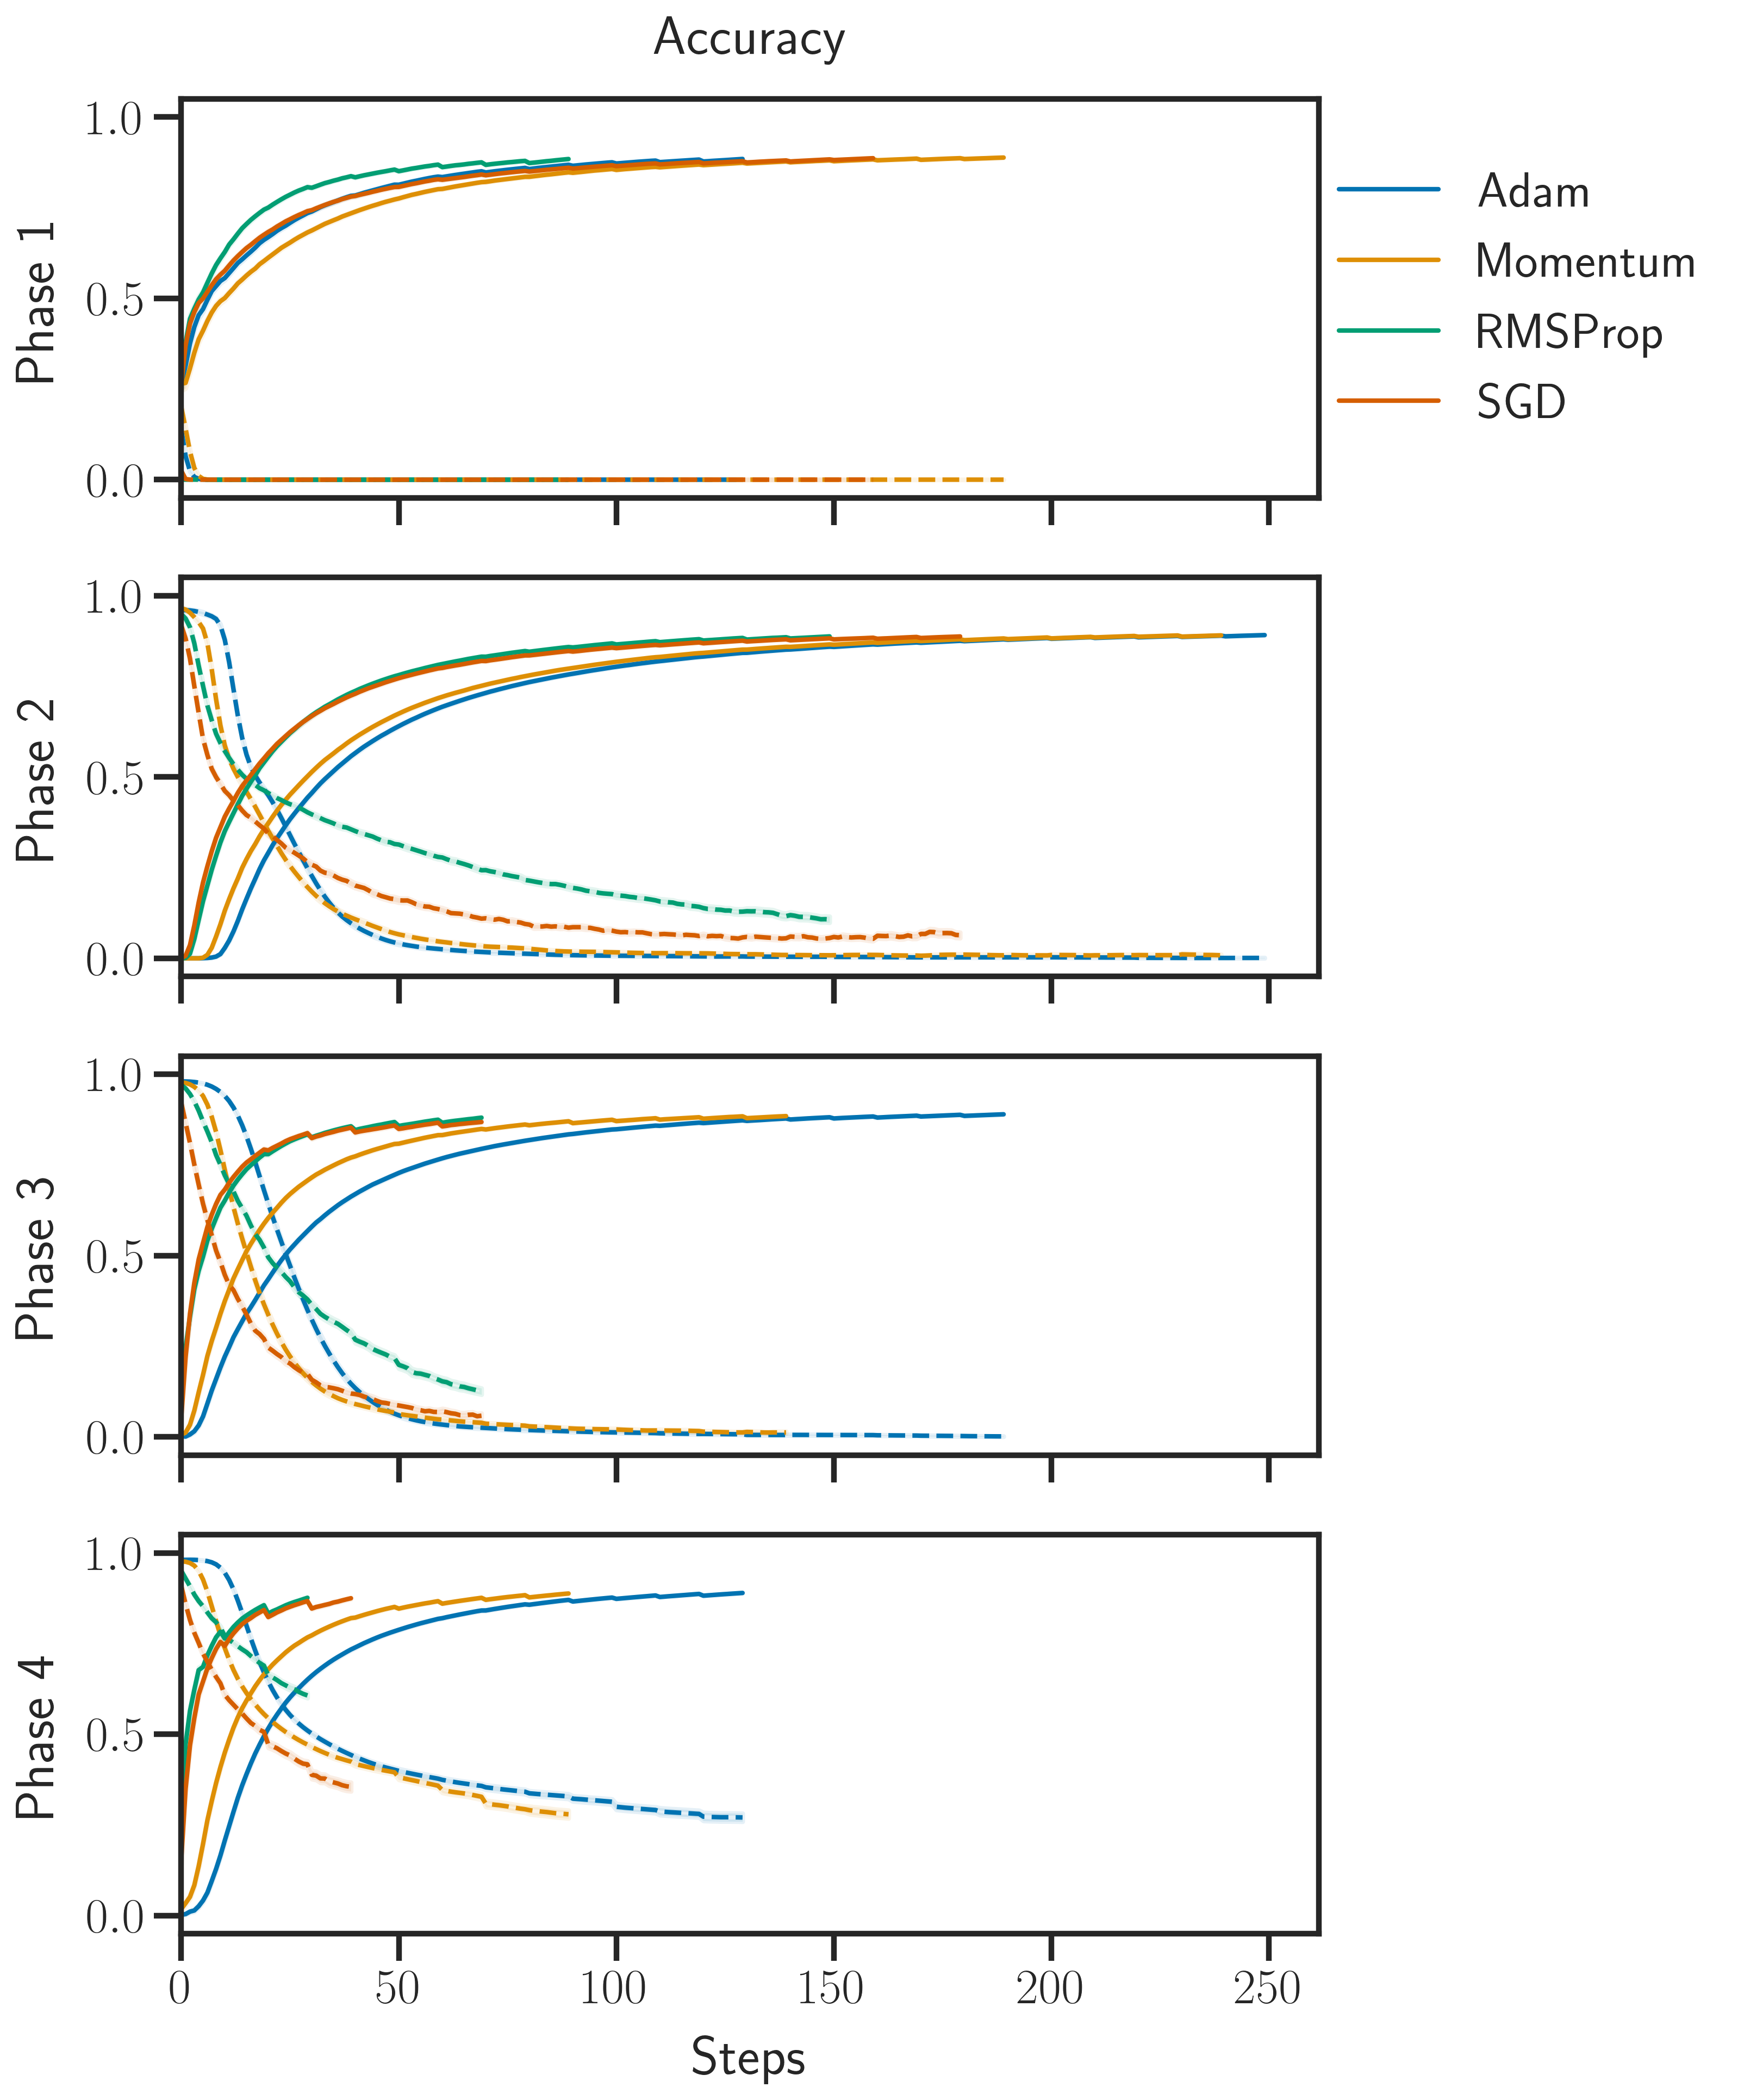

In [26]:
threshold = 125
fig, axarr = plt.subplots(4, 1, figsize=(9, 6), dpi=300, sharex=True)
colors = sns.color_palette('colorblind', len(data.keys()))
xmax = 0
for j in range(len(axarr)):
    ax = axarr[j]
    for i, (k, v) in enumerate(sorted(data.items(), key=lambda x: x[0])):
        other_phase = (j + 1) % 2 + 1
        x = np.where(v['d{}_count'.format(other_phase)][j] >= threshold)[0]
        xmax = max(xmax, max(x))
        y = v['d{}_avg'.format(other_phase)][j][x]
        yerr = v['d{}_sem'.format(other_phase)][j][x]
        ax.fill_between(x, y - yerr, y + yerr, color=colors[i], alpha=0.1)
        ax.plot(x, y, color=colors[i], linestyle='--', linewidth=2)

        x = np.where(v['online_count'][j] >= threshold)[0]
        xmax = max(xmax, max(x))
        y = v['online_avg'][j][x]
        yerr = v['online_sem'][j][x]
        ax.fill_between(x, y - yerr, y + yerr, color=colors[i], alpha=0.1)
        ax.plot(x, y, label=optimizer_nice_names[k], color=colors[i], linestyle='-', linewidth=2)
for j in range(len(axarr)):
    ax = axarr[j]
    ax.set_ylim(-0.05, 1.05)
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_xlim((0, xmax * 1.05))
    ax.set_ylabel('Phase {}'.format(j + 1), labelpad=10)
axarr[0].set_title('Accuracy', pad=20)
axarr[-1].set_xlabel('Steps', labelpad=10)
plt.legend(frameon=False, loc=(1, 3.725))
plt.subplots_adjust(top=2)
fig.savefig('experiment_2_mnist_accuracies.pdf', bbox_inches='tight')

In [27]:
phase_lengths = [{optimizer: list() for optimizer in rdf['optimizer'].unique()} for _ in range(4)]
for _, row in rdf.iterrows():
    for i in range(4):
        phase_lengths[i][row['optimizer']].append(row['phase_length'][i])

text = ''
text += '|-----------|------------------|------------------|------------------|------------------|\n'
text += '| Optimizer | Steps in Phase 1 | Steps in Phase 2 | Steps in Phase 3 | Steps in Phase 4 |\n'
text += '|-----------|------------------|------------------|------------------|------------------|\n'
for optimizer in sorted(list(phase_lengths[0].keys())):
    text += '| {0:>9} |   {1:>6.2f}+-{2:<4.2f}   |   {3:>6.2f}+-{4:<4.2f}   |   {5:>6.2f}+-{6:<4.2f}   |   {7:>6.2f}+-{8:<4.2f}   |\n'.format(
        optimizer_nice_names[optimizer],
        np.mean(phase_lengths[0][optimizer]), np.std(phase_lengths[0][optimizer]) / np.sqrt(len(phase_lengths[0][optimizer])),
        np.mean(phase_lengths[1][optimizer]), np.std(phase_lengths[1][optimizer]) / np.sqrt(len(phase_lengths[1][optimizer])),
        np.mean(phase_lengths[2][optimizer]), np.std(phase_lengths[2][optimizer]) / np.sqrt(len(phase_lengths[2][optimizer])),
        np.mean(phase_lengths[3][optimizer]), np.std(phase_lengths[3][optimizer]) / np.sqrt(len(phase_lengths[3][optimizer])))
text += '|-----------|------------------|------------------|------------------|------------------|'
with open('experiment_2_mnist_phase_lengths.txt', 'w') as outfile:
    print(text, file=outfile)
print(text)

|-----------|------------------|------------------|------------------|------------------|
| Optimizer | Steps in Phase 1 | Steps in Phase 2 | Steps in Phase 3 | Steps in Phase 4 |
|-----------|------------------|------------------|------------------|------------------|
|      Adam |   107.17+-1.93   |   220.64+-1.93   |   168.10+-1.69   |   114.86+-1.18   |
|  Momentum |   154.02+-2.40   |   211.20+-2.03   |   118.04+-1.89   |    77.16+-1.02   |
|   RMSProp |    71.89+-1.43   |   131.22+-1.57   |    54.95+-1.27   |    23.99+-0.68   |
|       SGD |   125.63+-2.39   |   153.14+-2.06   |    58.40+-1.86   |    30.32+-0.84   |
|-----------|------------------|------------------|------------------|------------------|


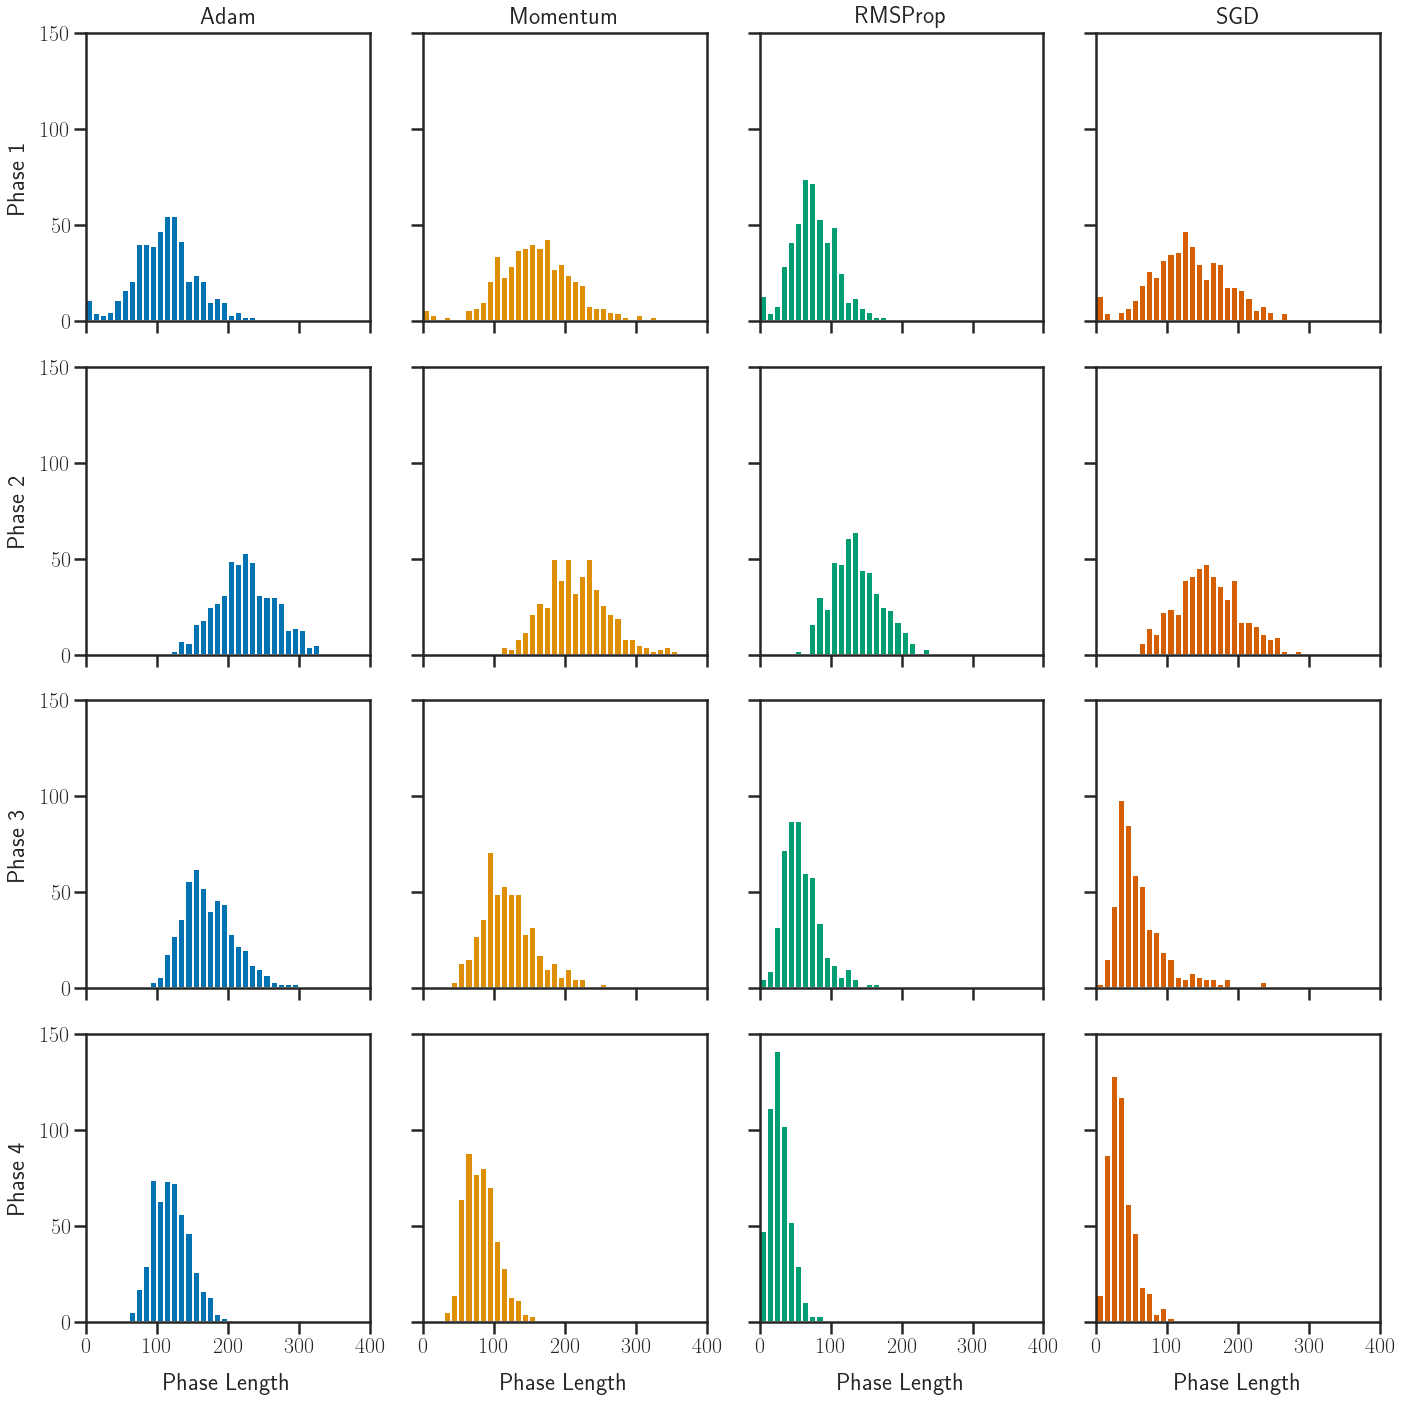

In [28]:
plt.close()
phase_lengths = {optimizer: [list() for _ in max_phase_lengths] for optimizer in rdf['optimizer'].unique()}
for _, row in rdf.iterrows():
    optimizer = row['optimizer']
    for i, phase_length in enumerate(row['phase_length']):
        phase_lengths[optimizer][i].append(phase_length)
sns.set_style('ticks')
sns.set_context('poster')
colors = sns.color_palette('colorblind', len(phase_lengths.keys()))
fig, axmat = plt.subplots(len(phase_lengths.keys()),
                          len(max_phase_lengths),
                          figsize=(5 * len(max_phase_lengths), 5 * len(phase_lengths.keys())),
                          sharex=True,
                          sharey=True)
for j, optimizer in enumerate(sorted(list(phase_lengths.keys()))):
    for i in range(len(max_phase_lengths)):
        axmat[i, j].set_xlim(0, 400)
        axmat[i, j].set_ylim(0, 150)
        axmat[i, j].hist(phase_lengths[optimizer][i], bins=range(0, max(max_phase_lengths), 10), color=colors[j])
        if i == 0:
            axmat[i, j].set_title(optimizer_nice_names[optimizer], pad=10)
        if i == len(phase_lengths.keys()) - 1:
            axmat[i, j].set_xlabel('Phase Length', labelpad=17)
            axmat[i, j].set_xticks([0, 100, 200, 300, 400])
        if j == 0:
            axmat[i, j].set_ylabel('Phase {}'.format(i + 1), labelpad=12)
            axmat[i, j].set_yticks([0, 50, 100, 150])
plt.tight_layout()
fig.savefig('experiment_2_mnist_phase_length_distribution.pdf', bbox_inches='tight')

In [29]:
accuracies = {name: [[list() for j in range(2)] for i in range(4)] for name in list(set(rdf['optimizer'].unique()) - {'constant'})}
for k,v in rdf.iterrows():
    if v['optimizer'] != 'constant':
        for i in range(4):
            for j in range(2):
                accuracies[v['optimizer']][i][j].append(v['accuracies'][sum(v['phase_length'][:i + 1]) - 1][j])

text = ''
text += '|-----------|-------|-------------------|-------------------|\n'
text += '| Optimizer | Phase | Accuracy on 1 + 2 | Accuracy on 3 + 4 |\n'
text += '|-----------|-------|-------------------|-------------------|\n'
for optimizer in sorted(list(accuracies.keys())):
    for phase in range(4):
        if (optimizer != 'adam') and (phase == 0):
            text += '|-----------|-------|-------------------|-------------------|\n'
        text += '| {0:>9} |   {1}   |   {2:>4.2f}+-{3:<6.4f}    |   {4:>4.2f}+-{5:<6.4f}    |\n'.format(
            optimizer_nice_names[optimizer] if phase == 1 else '',
            phase,
            np.mean(accuracies[optimizer][phase][0]), np.std(accuracies[optimizer][phase][0]) / np.sqrt(len(accuracies[optimizer][phase][0])),
            np.mean(accuracies[optimizer][phase][1]), np.std(accuracies[optimizer][phase][1]) / np.sqrt(len(accuracies[optimizer][phase][1])))
text += '|-----------|-------|-------------------|-------------------|\n'
with open('experiment_2_mnist_after_phase_accuracies.txt', 'w') as outfile:
    print(text, file=outfile)
print(text)

|-----------|-------|-------------------|-------------------|
| Optimizer | Phase | Accuracy on 1 + 2 | Accuracy on 3 + 4 |
|-----------|-------|-------------------|-------------------|
|           |   0   |   0.96+-0.0034    |   0.00+-0.0000    |
|      Adam |   1   |   0.00+-0.0007    |   0.98+-0.0005    |
|           |   2   |   0.98+-0.0004    |   0.01+-0.0012    |
|           |   3   |   0.32+-0.0065    |   0.98+-0.0004    |
|-----------|-------|-------------------|-------------------|
|           |   0   |   0.97+-0.0027    |   0.00+-0.0000    |
|  Momentum |   1   |   0.01+-0.0011    |   0.98+-0.0004    |
|           |   2   |   0.98+-0.0005    |   0.02+-0.0025    |
|           |   3   |   0.35+-0.0068    |   0.98+-0.0004    |
|-----------|-------|-------------------|-------------------|
|           |   0   |   0.96+-0.0036    |   0.00+-0.0000    |
|   RMSProp |   1   |   0.13+-0.0057    |   0.98+-0.0004    |
|           |   2   |   0.97+-0.0025    |   0.28+-0.0099    |
|       

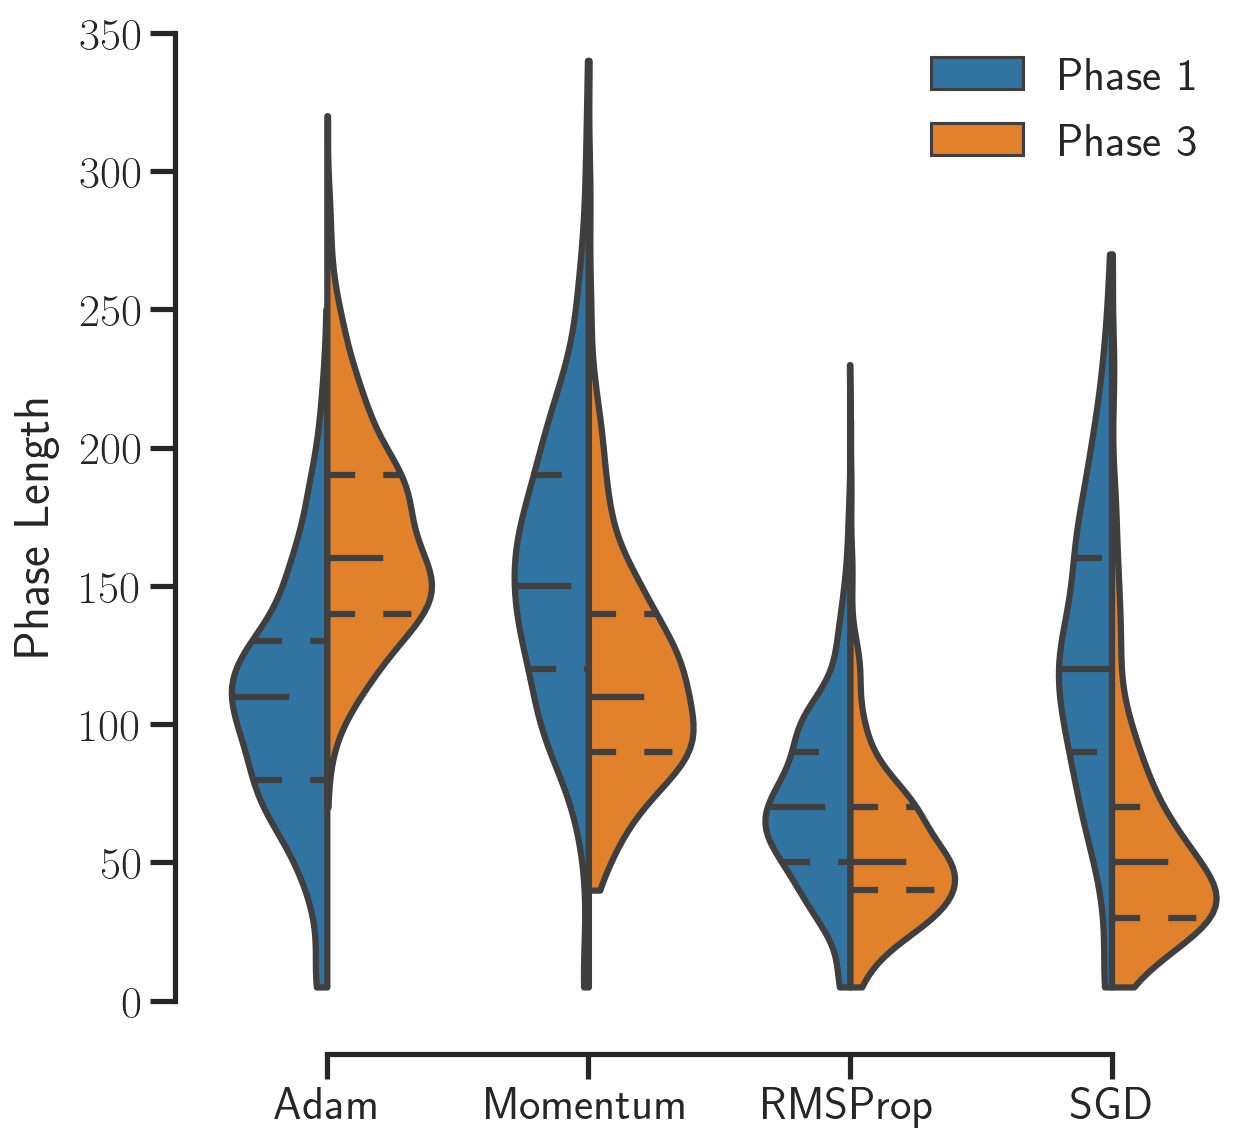

In [30]:
phase_lengths = [{optimizer: list() for optimizer in rdf['optimizer'].unique()} for _ in range(4)]
for _, row in rdf.iterrows():
    for i in range(4):
        phase_lengths[i][row['optimizer']].append(row['phase_length'][i])
boxplot_data = {'optimizer': [], 'phase': [], 'phase_length': []}
for optimizer in sorted(list(phase_lengths[2].keys())):
    for i in range(len(phase_lengths[0][optimizer])):
        first_phase_length = phase_lengths[0][optimizer][i]
        third_phase_length = phase_lengths[2][optimizer][i]
        boxplot_data['optimizer'].append(optimizer_nice_names[optimizer])
        boxplot_data['phase'].append('Phase 1')
        boxplot_data['phase_length'].append(first_phase_length)
        boxplot_data['optimizer'].append(optimizer_nice_names[optimizer])
        boxplot_data['phase'].append('Phase 3')
        boxplot_data['phase_length'].append(third_phase_length)
fig, ax = plt.subplots(1, 1, figsize=(9, 9), dpi=150)
ax.set_ylabel('Phase Length', labelpad=10)
sns.violinplot(x='optimizer', y='phase_length', hue='phase', data=boxplot_data, cut=0, split=True, inner='quartile', ax=ax)
sns.despine(offset=10, trim=True)
plt.legend(frameon=False)
fig.savefig('experiment_2_mnist_relearning.pdf', bbox_inches='tight')

In [31]:
ratios = {optimizer: list() for optimizer in rdf['optimizer'].unique()}
for _, row in rdf.iterrows():
    ratios[row['optimizer']].append(row['phase_length'][0] / row['phase_length'][2])

text = ''
text += '|-----------|------------|\n'
text += '| Optimizer |  Speedup   |\n'
text += '|---------- |------------|\n'
for optimizer in sorted(list(ratios.keys())):
    text += '| {0:>9} | {1:>4.2f}+-{2:<4.2f} |\n'.format(
        optimizer_nice_names[optimizer],
        np.mean(ratios[optimizer]),
        np.std(ratios[optimizer]) / np.sqrt(len(ratios[optimizer])))
text += '|---------- |------------|\n'
with open('experiment_2_mnist_speedup.txt', 'w') as outfile:
    print(text, file=outfile)
print(text)

|-----------|------------|
| Optimizer |  Speedup   |
|---------- |------------|
|      Adam | 0.67+-0.01 |
|  Momentum | 1.52+-0.04 |
|   RMSProp | 1.90+-0.10 |
|       SGD | 3.62+-0.18 |
|---------- |------------|



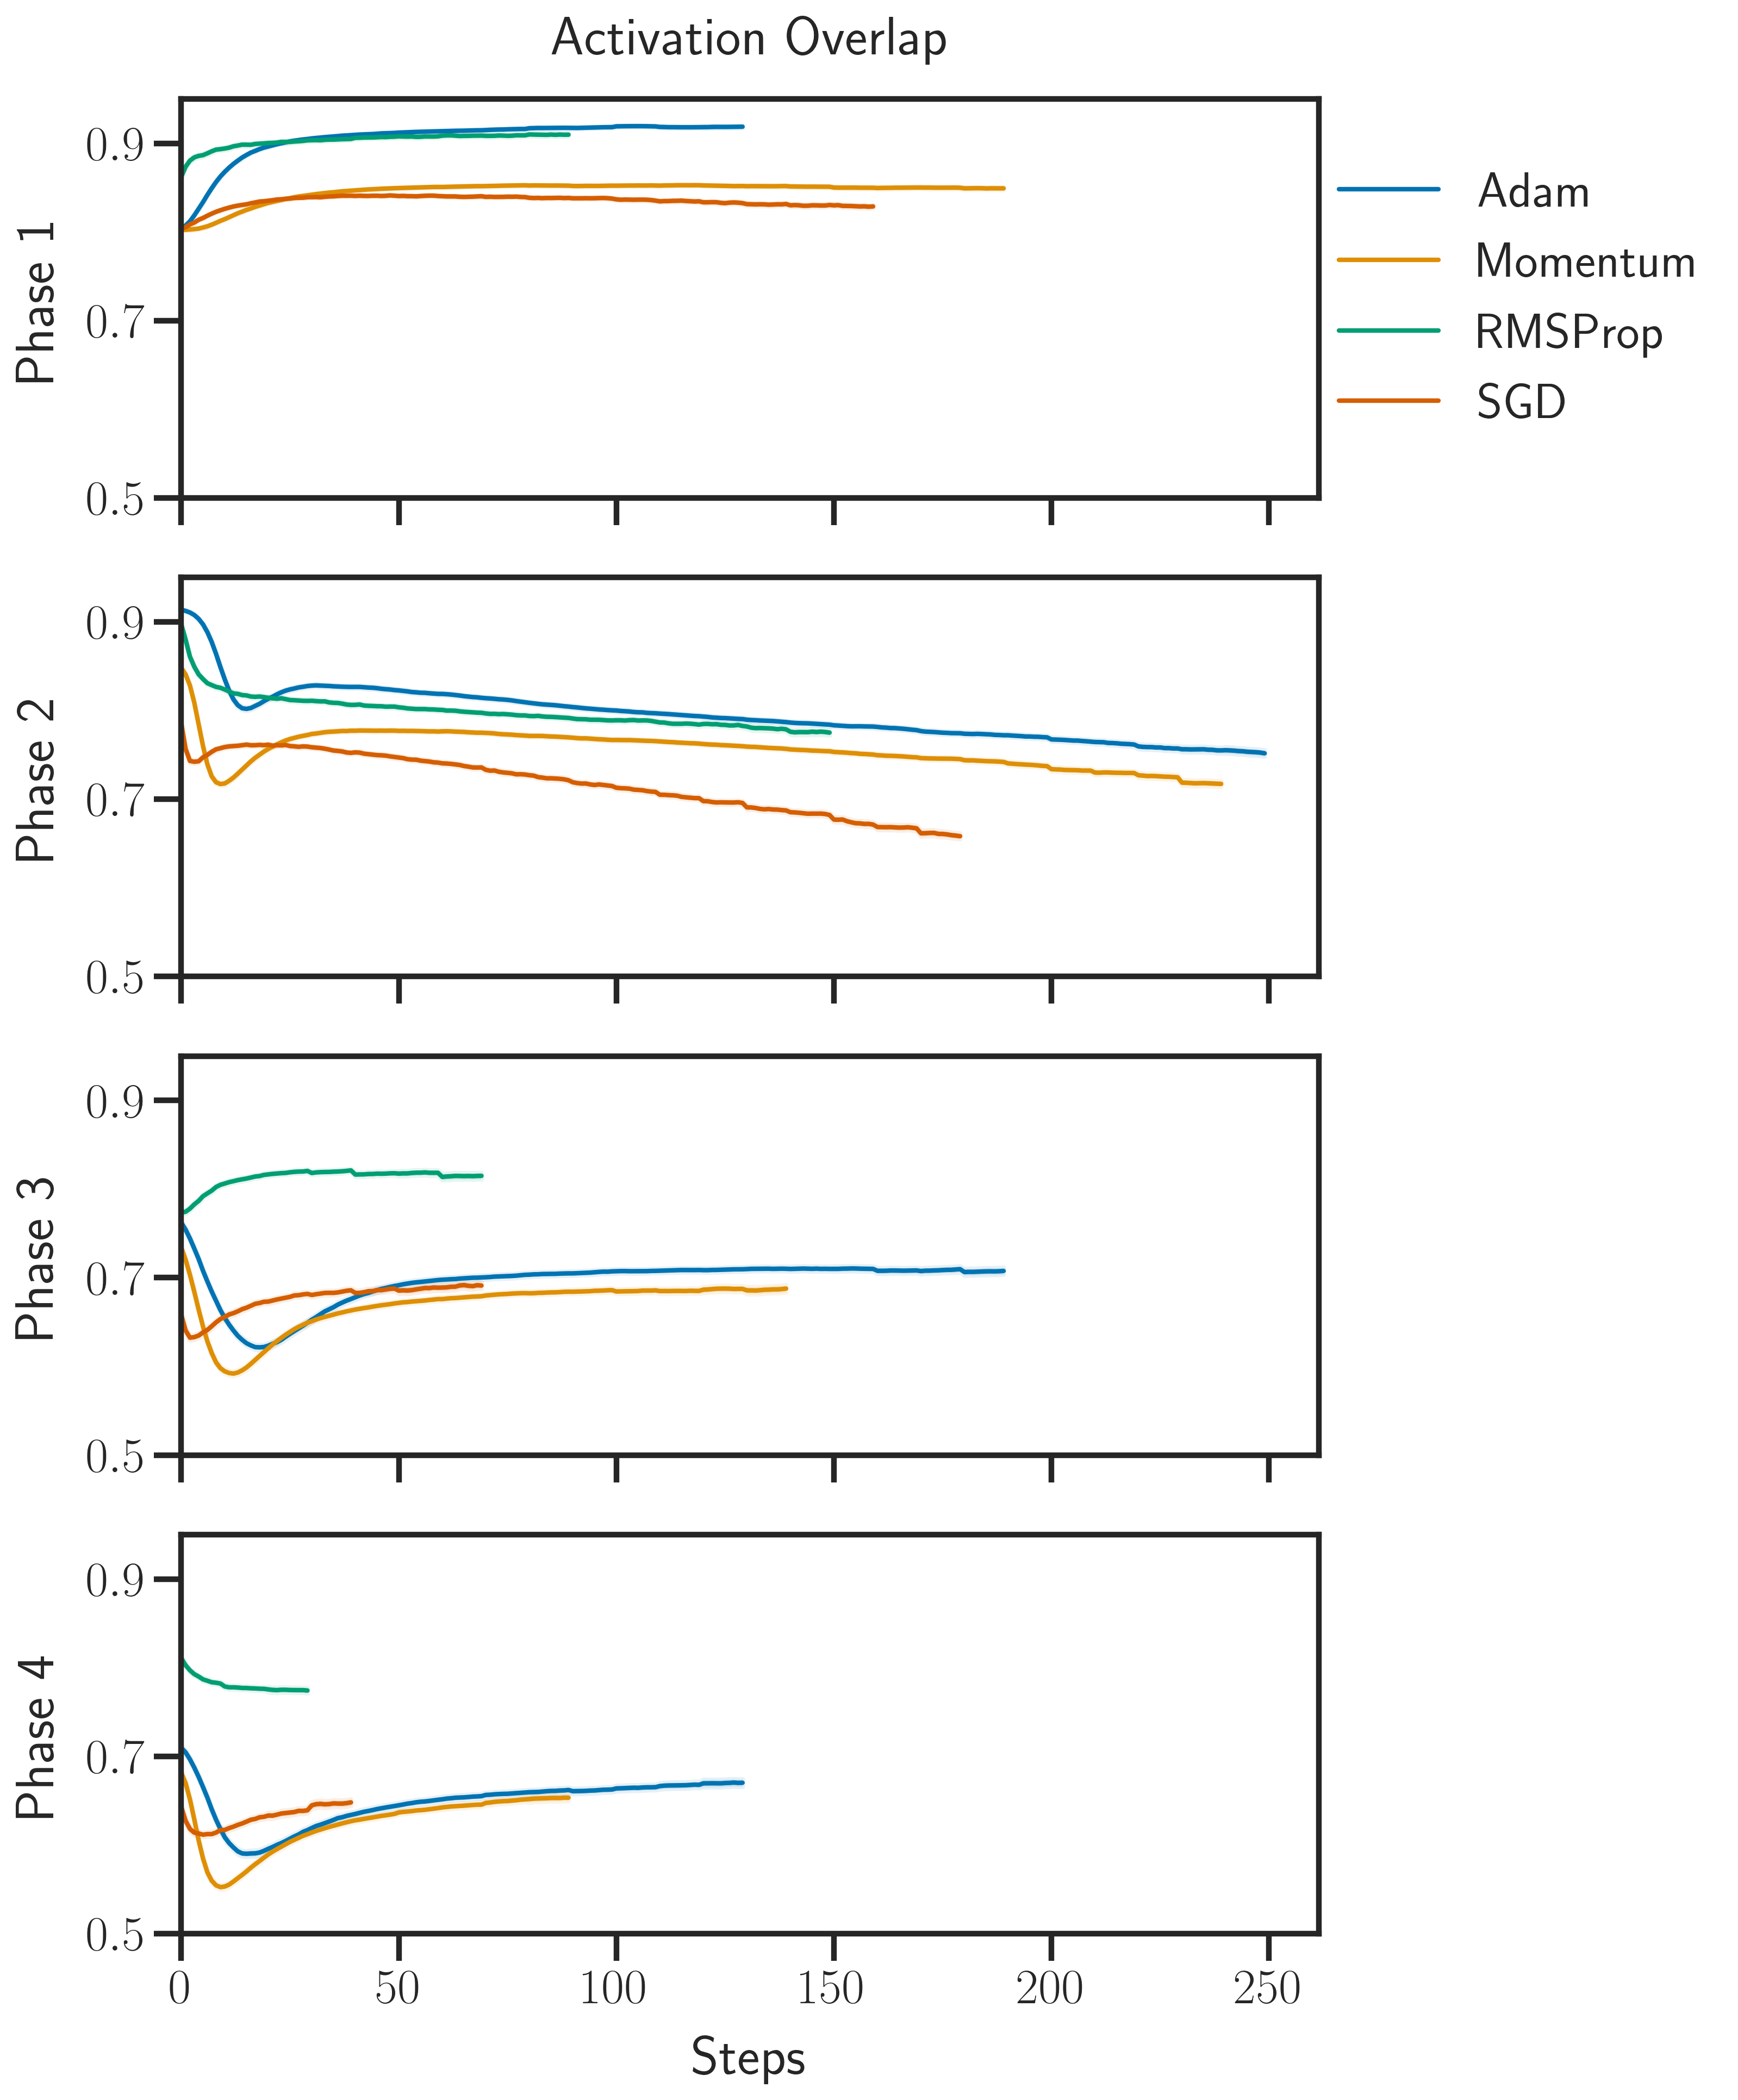

In [32]:
threshold = 125
fig, axarr = plt.subplots(4, 1, figsize=(9, 6), dpi=300, sharex=True)
colors = sns.color_palette('colorblind', len(data.keys()))
xmax = 0
for j in range(len(axarr)):
    ax = axarr[j]
    for i, (k, v) in enumerate(sorted(data.items(), key=lambda x: x[0])):
        x = np.where(v['ao_count'][j] >= threshold)[0]
        xmax = max(xmax, max(x))
        y = v['ao_avg'][j][x]
        yerr = v['ao_sem'][j][x]
        ax.fill_between(x, y - yerr, y + yerr, color=colors[i], alpha=0.1)
        ax.plot(x, y, label=optimizer_nice_names[k], color=colors[i], linestyle='-', linewidth=2)
for j in range(len(axarr)):
    ax = axarr[j]
    ax.set_ylim(0.525, 0.95)
    ax.set_yticks([0.5, 0.7, 0.9])
    ax.set_xlim((0, xmax * 1.05))
    ax.set_ylabel('Phase {}'.format(j + 1), labelpad=10)
axarr[0].set_title('Activation Overlap', pad=20)
axarr[-1].set_xlabel('Steps', labelpad=10)
plt.legend(frameon=False, loc=(1, 3.725))
plt.subplots_adjust(top=2)
fig.savefig('experiment_2_mnist_activation_overlap.pdf', bbox_inches='tight')